In [1]:
# Step 1: Load Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 2: Load datasets

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) =fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

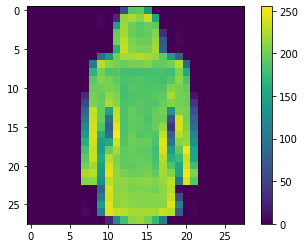

In [16]:
plt.figure()
plt.imshow(train_images[315])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_labels[315]

4

In [17]:
train_images = train_images / 255.0

In [18]:
test_images = test_images / 255.0

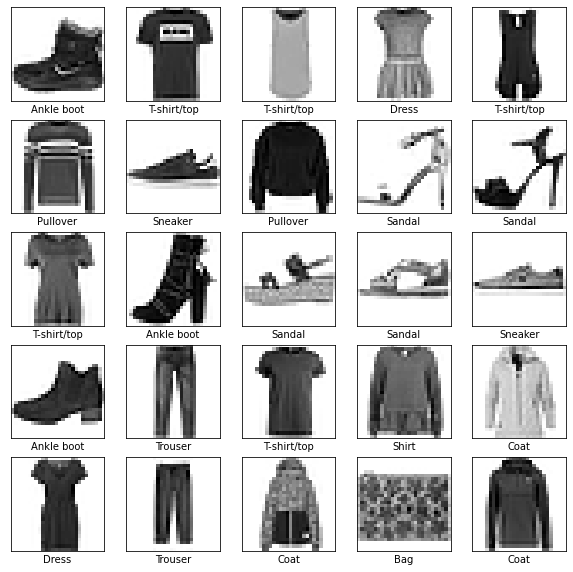

In [21]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
# Step 3: Build the neural network

In [23]:
model = keras.Sequential()

In [76]:
from keras.layers import Dense, Flatten

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [77]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [78]:
# Step 4: Train our model

In [80]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1992 - accuracy: 0.9285
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1931 - accuracy: 0.9300
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1876 - accuracy: 0.9317
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1884 - accuracy: 0.9315
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1830 - accuracy: 0.9341
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1786 - accuracy: 0.9354
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1765 - accuracy: 0.9365
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1734 - accuracy: 0.9382
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1692 - accuracy: 0.9392
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/step

In [82]:
# Step 5: Evaluation

In [83]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.3685 - accuracy: 0.8930


In [84]:
predictions = model.predict(test_images)

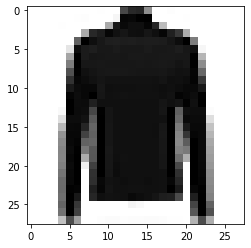

In [93]:
plt.figure()
plt.imshow(test_images[255], cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [94]:
predictions[255]

array([5.7456945e-04, 1.3120462e-04, 2.4966262e-01, 1.6157278e-04,
       7.4516279e-01, 8.6162900e-06, 4.0425588e-03, 9.5348532e-06,
       2.4638505e-04, 2.1315151e-07], dtype=float32)

In [95]:
np.argmax(predictions[255])

4

In [96]:
predictions_array = predictions[255]

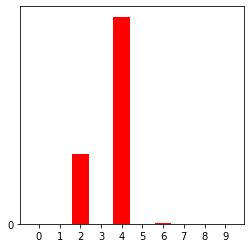

In [97]:
plt.figure(figsize=(4, 4))
plt.xticks(range(10))
plt.yticks(range(1))
plt.bar(range(10), predictions_array, color="#ff0000")
plt.show()

In [90]:
# Step 6: Save the model

In [92]:
model.save_weights("model2.h5")